In [1]:
from keras.datasets import cifar10
import numpy as np

Using TensorFlow backend.


In [2]:
#載入keras的cifar10資料集
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
print("train data: imsges:",x_img_train.shape,"labels:",y_label_train.shape)
print("test data: imsges:",x_img_test.shape,"labels:",y_label_test.shape)

train data: imsges: (50000, 32, 32, 3) labels: (50000, 1)
test data: imsges: (10000, 32, 32, 3) labels: (10000, 1)


In [4]:
#將資料集的數值範圍從0~255設定成0~1
print("原本的數值範圍 : ",x_img_train.min(),"~",x_img_train.max())
x_img_train_normalize=x_img_train.astype('float32')/255.0
x_img_test_normalize=x_img_test.astype('float32')/255.0
print("正規後的數值範圍 : ",x_img_train_normalize.min(),"~",x_img_train_normalize.max())

原本的數值範圍 :  0 ~ 255
正規後的數值範圍 :  0.0 ~ 1.0


In [5]:
from keras.utils import np_utils

#將標籤進行onehot encoding
y_label_train_OneHot=np_utils.to_categorical(y_label_train)
y_label_test_OneHot=np_utils.to_categorical(y_label_test)

In [6]:
#設定類神經網路
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import Adam

model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
________________________________________________

In [7]:
from keras import backend as keras

#開始訓練
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=1e-3),metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize,y_label_train_OneHot,validation_split=0.2,epochs=10,batch_size=300,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 16s 394us/step - loss: 1.8382 - accuracy: 0.3195 - val_loss: 1.5992 - val_accuracy: 0.4241
Epoch 2/10
40000/40000 [==============================] - 13s 328us/step - loss: 1.4264 - accuracy: 0.4823 - val_loss: 1.2660 - val_accuracy: 0.5430
Epoch 3/10
40000/40000 [==============================] - 13s 327us/step - loss: 1.1966 - accuracy: 0.5690 - val_loss: 1.0324 - val_accuracy: 0.6352
Epoch 4/10
40000/40000 [==============================] - 13s 329us/step - loss: 1.0364 - accuracy: 0.6316 - val_loss: 0.9523 - val_accuracy: 0.6664
Epoch 5/10
40000/40000 [==============================] - 13s 334us/step - loss: 0.9023 - accuracy: 0.6820 - val_loss: 0.8628 - val_accuracy: 0.7022
Epoch 6/10
40000/40000 [==============================] - 13s 334us/step - loss: 0.7954 - accuracy: 0.7210 - val_loss: 0.8140 - val_accuracy: 0.7123
Epoch 7/

In [8]:
import matplotlib.pyplot as plt

#定義訓練歷史的涵式
def show_train_history(train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

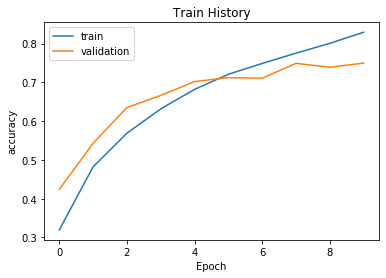

In [9]:
show_train_history('accuracy','val_accuracy')

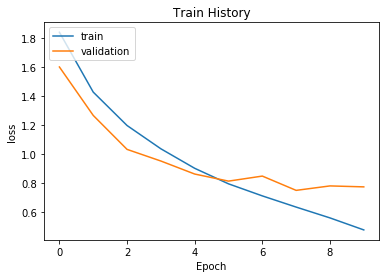

In [10]:
show_train_history('loss','val_loss')

In [11]:
#評估測試及準確度
scores=model.evaluate(x_img_test_normalize,y_label_test_OneHot,verbose=0)
scores[1]

0.7461000084877014

In [12]:
#預測測試集類別
prediction=model.predict_classes(x_img_test_normalize)

In [13]:
import matplotlib.pyplot as plt

#定義畫圖的涵式
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,i+1)
        ax.imshow(images[idx],cmap='binary')
        title="label="+str(labels[idx])
        if len (prediction)>0:
            title+=",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

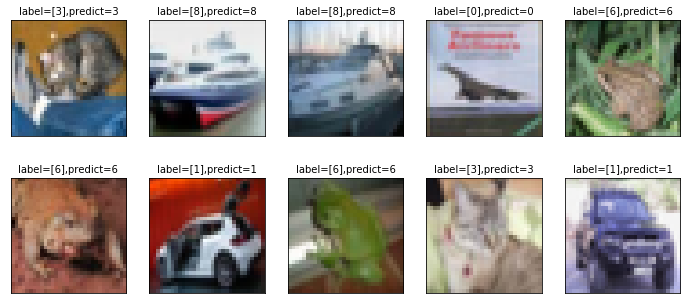

In [14]:
plot_images_labels_prediction(x_img_test,y_label_test,prediction,0,10)

In [15]:
import pandas as pd

#混淆矩陣分析圖
pd.crosstab(y_label_test.reshape(-1),prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,761,8,89,9,38,0,13,8,59,15
1,20,879,3,2,7,1,16,1,18,53
2,37,4,682,27,120,27,72,18,9,4
3,19,6,101,506,118,111,90,32,7,10
4,9,1,64,27,790,17,35,49,6,2
5,5,2,73,172,82,548,47,60,6,5
6,5,2,32,21,38,9,880,6,6,1
7,14,0,43,29,81,35,7,784,1,6
8,51,28,21,13,7,4,14,3,844,15
